In [1]:
import csv
import numpy
import matplotlib.pyplot as plt

In [2]:
train_data = numpy.loadtxt("data/galaxies_train.csv", delimiter=",", skiprows=1)
test_data = numpy.loadtxt("data/galaxies_test.csv", delimiter=",", skiprows=1)

X_train = train_data[:,1:]
t_train = train_data[:,0]
X_test = test_data[:,1:]
t_test = test_data[:,0]
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of attributes: %i" % X_train.shape[1])


Number of training instances: 500
Number of test instances: 500
Number of attributes: 10


In [3]:


class NearestNeighborRegressor:
    
    def __init__(self, n_neighbors=1, dist_measure="euclidean", dist_matrix=None):
        """
        Initializes the model.
        
        Parameters
        ----------
        n_neighbors : The number of nearest neigbhors (default 1)
        dist_measure : The distance measure used (default "euclidean")
        dist_matrix : The distance matrix if needed (default "None")
        """
        
        self.n_neighbors = n_neighbors
        self.dist_measure = dist_measure
        self.dist_matrix = dist_matrix
    
    def fit(self, X, t):
        """
        Fits the nearest neighbor regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        t : Array of length n_samples
        """ 
        
        self.X_train = X
        self.t_train = t
    
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of length n_samples
        """         
        self.fit(X_train, t_train)
        predictions = []
        for i in range(len(X)):
            closest = self.distance(X[i])
            closest = numpy.argsort(closest)
            predictions.append(numpy.mean(self.t_train[closest[:self.n_neighbors]]))
        predictions = numpy.array(predictions)
        return predictions
    def distance(self, X_row):
        distance = []
        if (self.dist_measure == "euclidean"):
            for i in range(len(self.X_train)):
                distance.append(self.euclDist(X_row, self.X_train[i]))
        elif (self.dist_measure == "distance"):
            for i in range(len(self.X_train)):
                distance.append(self.otherDist(X_row, X_train[i]))
        return distance
    def euclDist(self,X,Y):
        return numpy.sqrt(numpy.dot((X-Y).T,(X-Y)))
    #TODO: 
    def otherDist(self,X,Y):
        return numpy.dot(numpy.dot((X-Y).T,self.dist_matrix),(X-Y))
    def rmse(self, t, tp):
        return numpy.sqrt(numpy.mean((t-tp)**2))   
          
        
        

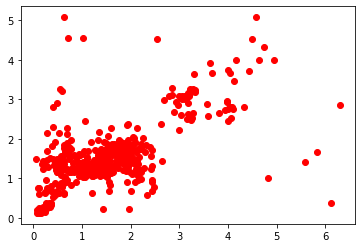

RMSE(eucledian):  0.8243064553494784


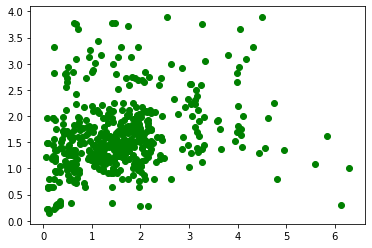

RMSE(altDist):  1.0997971796682453


In [4]:
regKNN = NearestNeighborRegressor(n_neighbors=3)
predictions = regKNN.predict(X_test)
plt.scatter(t_test,predictions,color='red')
plt.show()
print("RMSE(eucledian): ", regKNN.rmse(t_test, predictions))
values = numpy.zeros(10)
values[:8] += 0.00001
values[8:10] += 1
M = numpy.zeros((10,10), float)
numpy.fill_diagonal(M,1)
M=M*values
regNewKNN = NearestNeighborRegressor(n_neighbors=3, dist_measure="distance", dist_matrix = M)
newPred = regNewKNN.predict(X_test)
plt.scatter(t_test,newPred, color='green')
plt.show()
print("RMSE(altDist): ", regNewKNN.rmse(t_test, newPred))
